# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

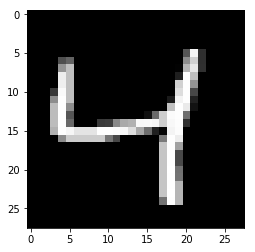

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded =  tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size)
# Sigmoid output from logits
decoded =  tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6876
Epoch: 1/20... Training loss: 0.6829
Epoch: 1/20... Training loss: 0.6781
Epoch: 1/20... Training loss: 0.6738
Epoch: 1/20... Training loss: 0.6635
Epoch: 1/20... Training loss: 0.6592
Epoch: 1/20... Training loss: 0.6530
Epoch: 1/20... Training loss: 0.6413
Epoch: 1/20... Training loss: 0.6296
Epoch: 1/20... Training loss: 0.6189
Epoch: 1/20... Training loss: 0.6041
Epoch: 1/20... Training loss: 0.5954
Epoch: 1/20... Training loss: 0.5798
Epoch: 1/20... Training loss: 0.5653
Epoch: 1/20... Training loss: 0.5499
Epoch: 1/20... Training loss: 0.5380
Epoch: 1/20... Training loss: 0.5181
Epoch: 1/20... Training loss: 0.4990
Epoch: 1/20... Training loss: 0.4814
Epoch: 1/20... Training loss: 0.4640
Epoch: 1/20... Training loss: 0.4512
Epoch: 1/20... Training loss: 0.4422
Epoch: 1/20... Training loss: 0.4245
Epoch: 1/20... Training loss: 0.4065
Epoch: 1/20... Training loss: 0.3933
E

Epoch: 1/20... Training loss: 0.2017
Epoch: 1/20... Training loss: 0.2079
Epoch: 1/20... Training loss: 0.2054
Epoch: 1/20... Training loss: 0.2050
Epoch: 1/20... Training loss: 0.2070
Epoch: 1/20... Training loss: 0.2026
Epoch: 1/20... Training loss: 0.2086
Epoch: 1/20... Training loss: 0.2023
Epoch: 1/20... Training loss: 0.2063
Epoch: 1/20... Training loss: 0.2050
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.2097
Epoch: 1/20... Training loss: 0.2203
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.2046
Epoch: 1/20... Training loss: 0.2058
Epoch: 1/20... Training loss: 0.2081
Epoch: 1/20... Training loss: 0.2009
Epoch: 1/20... Training loss: 0.1967
Epoch: 1/20... Training loss: 0.2136
Epoch: 1/20... Training loss: 0.2037
Epoch: 1/20... Training loss: 0.2147
Epoch: 1/20... Training loss: 0.2039
Epoch: 1/20... Training loss: 0.2042
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1998
E

Epoch: 2/20... Training loss: 0.1670
Epoch: 2/20... Training loss: 0.1716
Epoch: 2/20... Training loss: 0.1699
Epoch: 2/20... Training loss: 0.1699
Epoch: 2/20... Training loss: 0.1675
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1697
Epoch: 2/20... Training loss: 0.1636
Epoch: 2/20... Training loss: 0.1709
Epoch: 2/20... Training loss: 0.1666
Epoch: 2/20... Training loss: 0.1686
Epoch: 2/20... Training loss: 0.1615
Epoch: 2/20... Training loss: 0.1642
Epoch: 2/20... Training loss: 0.1685
Epoch: 2/20... Training loss: 0.1665
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1651
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1686
Epoch: 2/20... Training loss: 0.1666
Epoch: 2/20... Training loss: 0.1703
Epoch: 2/20... Training loss: 0.1678
Epoch: 2/20... Training loss: 0.1701
Epoch: 2/20... Training loss: 0.1631
Epoch: 2/20... Training loss: 0.1664
Epoch: 2/20... Training loss: 0.1629
Epoch: 2/20... Training loss: 0.1634
E

Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1496
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1507
Epoch: 3/20... Training loss: 0.1455
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1478
Epoch: 3/20... Training loss: 0.1510
Epoch: 3/20... Training loss: 0.1517
Epoch: 3/20... Training loss: 0.1432
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1479
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1474
Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... Training loss: 0.1509
Epoch: 3/20... Training loss: 0.1494
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1457
Epoch: 3/20... Training loss: 0.1471
Epoch: 3/20... Training loss: 0.1490
Epoch: 3/20... Training loss: 0.1425
Epoch: 3/20... Training loss: 0.1470
Epoch: 3/20... Training loss: 0.1458
E

Epoch: 4/20... Training loss: 0.1335
Epoch: 4/20... Training loss: 0.1307
Epoch: 4/20... Training loss: 0.1311
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1321
Epoch: 4/20... Training loss: 0.1343
Epoch: 4/20... Training loss: 0.1365
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1375
Epoch: 4/20... Training loss: 0.1367
Epoch: 4/20... Training loss: 0.1313
Epoch: 4/20... Training loss: 0.1310
Epoch: 4/20... Training loss: 0.1309
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1332
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1325
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1320
Epoch: 4/20... Training loss: 0.1347
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1329
Epoch: 4/20... Training loss: 0.1321
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1321
Epoch: 4/20... Training loss: 0.1334
E

Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1283
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1213
E

Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1192
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1170
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1195
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1110
E

Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1116
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1131
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1099
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1100
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1126
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1077
E

Epoch: 7/20... Training loss: 0.1071
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1063
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1039
E

Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0954
Epoch: 7/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1038
Epoch: 8/20... Training loss: 0.1038
Epoch: 8/20... Training loss: 0.1038
Epoch: 8/20... Training loss: 0.1015
E

Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.1001
E

Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0959
E

Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.1014
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.1017
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0998
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0894
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0894
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0893
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0984
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0871
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.1004
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

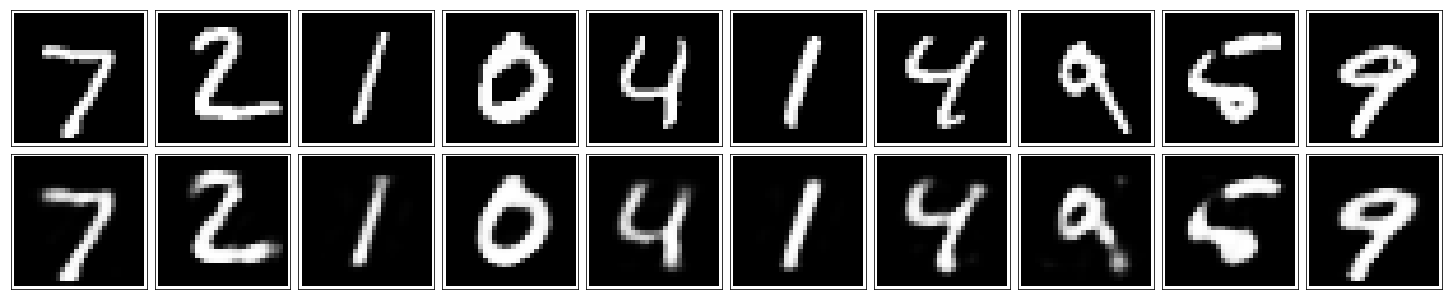

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.